# Computational Methods for Finance - Option Pricing - BNB/USD

In [1]:
import yfinance as yf                              # pyhton libarary to download data fro
import numpy as np                                 # store and organise heterogeneous data arrays
import pandas as pd                                # library for data analysis that focuses on tabular data
import matplotlib as mpl                           # data plotting library
import matplotlib.pyplot as plt                    # main plotting package 
import scipy.stats as si                           # used for probability distrubition   
import os
from mpl_toolkits.mplot3d import Axes3D

## Getting data from Yahoo Finance 

In [2]:
data = yf.download("BNB-USD", start="2021-03-31", end="2022-03-31")  

# Download the historical data from yahoo and save it as a pandas DataFrame.

[*********************100%***********************]  1 of 1 completed


In [3]:
data['Adj Close'].head()  #Shows the first five rows of downloaded data

Date
2021-03-30    311.426483
2021-03-31    302.063446
2021-04-01    335.212891
2021-04-02    339.007721
2021-04-03    323.133514
Name: Adj Close, dtype: float64

In [4]:
data['Adj Close'].tail() #Shows the last five rows of downloaded data

Date
2022-03-26    415.919800
2022-03-27    430.503265
2022-03-28    430.390869
2022-03-29    434.505676
2022-03-30    442.684845
Name: Adj Close, dtype: float64

## Calculation of Spot price and annualaised volatility

In [5]:
S = data['Adj Close'][-1]    # finding spot prie as at current date
print('The spot price is $', round(S,2), '.')

The spot price is $ 442.68 .


In [6]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1)) # deriving annualised volatility of the BNB-USD.
vol_h = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 107.7 %


array([<AxesSubplot:xlabel='Date'>], dtype=object)

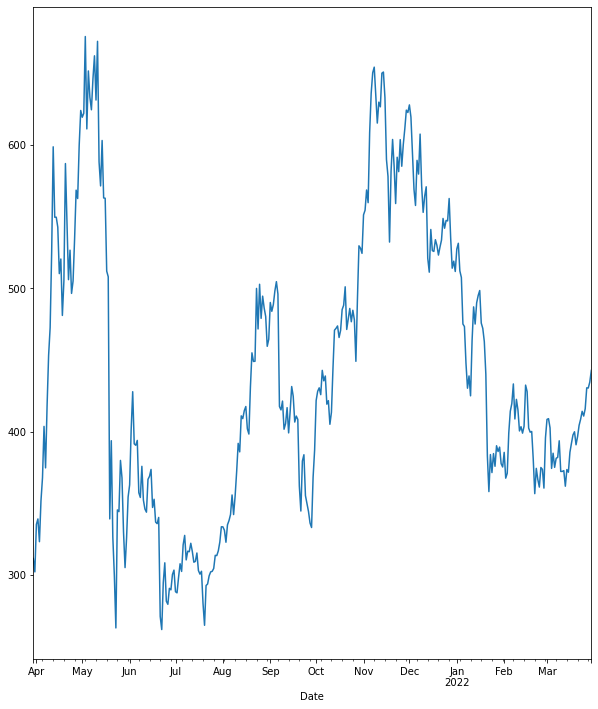

In [7]:
data['Adj Close'].plot(figsize=(10, 12), subplots=True) #plotting adj closing price on graph over one year

# Pricing of the option using Binomial Tree

## Data input

In [8]:
import numpy as np
import os

In [9]:
S0 = 442.68             # spot BNB-USD price
K = 400.0               # strike
T = 1/12                # maturity 
r = 0.0172              # risk free rate 
sig = 1.07              # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

## Step 1: Create the binomial price tree

In [10]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [11]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [12]:
S

array([[442.68      , 529.10161102, 632.39476547, 755.85318788],
       [  0.        , 370.37419339, 442.68      , 529.10161102],
       [  0.        ,   0.        , 309.87856494, 370.37419339],
       [  0.        ,   0.        ,   0.        , 259.26408136]])

In [13]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4568672564346093

## Step 2: Find option value at each final node

In [14]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  29.62580661],
       [  0.        ,   0.        ,   0.        , 140.73591864]])

## Step 3: Find European option value at earlier nodes

In [15]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 34.47757137,   8.73106381,   0.        ,   0.        ],
       [  0.        ,  56.16511086,  16.08305966,   0.        ],
       [  0.        ,   0.        ,  89.9303696 ,  29.62580661],
       [  0.        ,   0.        ,   0.        , 140.73591864]])

In [16]:
print('European ' + payoff, '$', str( V[0,0]))

European put $ 34.47757137058048


# Pricing of the option using Monte Carlo Simulation

In [17]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

# S[t] is today's price, S[t-1] is yesterday's price, random number is denoted by rn, dt change,p is time steps, number of times the simulation is run.


## Data Input

In [18]:
T = 1/12
r = 0.0172
sigma = 1.07
S0 = 442
K = 400

In [19]:
S = mcs_simulation_np(10000)

In [20]:
S = np.transpose(S)
S

array([[442.        , 441.13670387, 442.09432671, ..., 661.25202218,
        660.84879376, 661.44134624],
       [442.        , 441.84400031, 441.6629013 , ..., 313.82018281,
        314.85359005, 315.536405  ],
       [442.        , 441.45698075, 441.92187964, ..., 442.42541297,
        444.30476077, 445.87252413],
       ...,
       [442.        , 442.19598707, 443.40241253, ..., 341.36110602,
        344.43718199, 344.88924016],
       [442.        , 438.87071719, 440.23062133, ..., 493.60234087,
        491.98451908, 491.27790328],
       [442.        , 440.64292025, 441.52914922, ..., 303.52217888,
        303.05074029, 301.91013475]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values of BNB-USD')

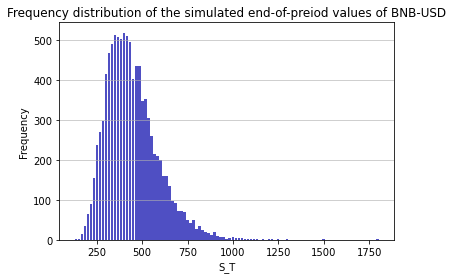

In [21]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values of BNB-USD')

In [22]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 33.71157549350229


In [23]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 77.1179258139546


# Pricing of the option using Black and Scholes

In [24]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol_h ** 2) * T) / (vol_h * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol_h ** 2) * T) / (vol_h * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

## Data Input

In [25]:
S = 440
K = 400
T = 1/12
r = 0.0172

## Calculation of theoratical pricing

In [26]:
call = euro_option_bs(S, K, T, r, vol_h, 'call')
print('The BS call price is $', round(call, 2))

The BS call price is $ 74.61


In [27]:
put = euro_option_bs(S, K, T, r, vol_h, 'put')
print('The BS put price is $', round(put, 2))

The BS put price is $ 34.03


## Payoff Diagram for European Call and Put

In [28]:
S = np.linspace(250,650,101)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 480, 1/12, 0.0172, 1.07, 'call')

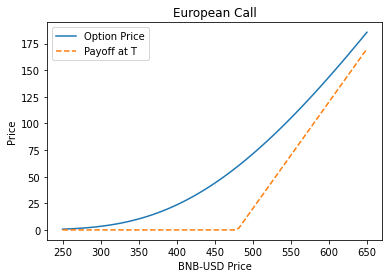

In [29]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-480,0), '--')
plt.xlabel('BNB-USD Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

##### 

In [30]:
S = np.linspace(250,650,101)
pp = np.zeros((len(S),1))
for i in range(len(S)):
    pp[i] = euro_option_bs(S[i], 400, 1/12, 0.0172, 1.07, 'put')

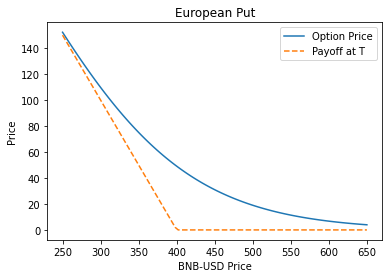

In [31]:
fig = plt.figure()
plt.plot(S, pp, '-')
plt.plot(S, np.maximum(400-S,0), '--')
plt.xlabel('BNB-USD Price')
plt.ylabel('Price')
plt.title('European Put')
plt.legend(['Option Price','Payoff at T'])

# Calculation of Greeks

## Delta

In [32]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [33]:
delta(440, 480, 1/12, 0.0172, 0, 1.07, 'call')

0.451205651724573

In [34]:
delta(440, 400, 1/12, 0.0172, 0, 1.07, 'put')

-0.32001880794013526

In [35]:
S = np.linspace(250,650,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 480, 1/12, 0.0172, 0, 1.07, 'call')
    Delta_Put [i] = delta(S[i], 400, 1/12, 0.0172, 0, 1.07, 'put')

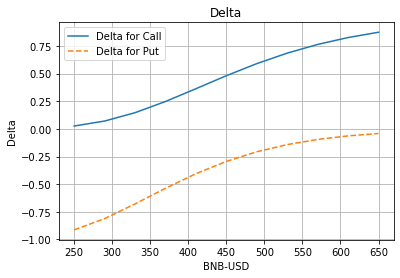

In [36]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('BNB-USD')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

## Surface of Delta

In [37]:
S = np.linspace(250, 650, 51)
T = np.linspace(1, 31, 31)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 480, T[i], 0.0172, 0, 1.07, 'call')

C:\Users\FULTON~1\AppData\Local\Temp/ipykernel_4596/2309330999.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


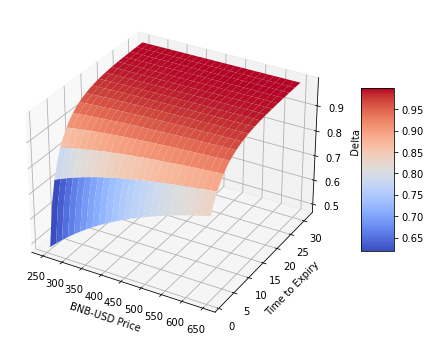

In [38]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB-USD Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Gamma

In [39]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [40]:
gamma(440, 480, 1/12, 0.0172, 0, 1.07, 'call')

0.00291339588639047

In [41]:
gamma(440, 400, 1/12, 0.0172, 0, 1.07, 'put')

0.0026313320689890364

In [42]:
S = np.linspace(250,650,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 480, 1/12, 0.0172, 0, 1.07, 'call')

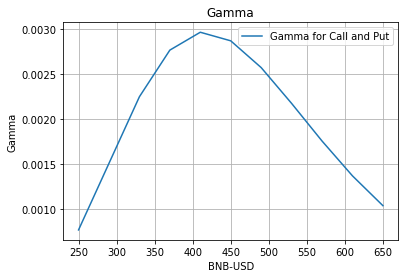

In [43]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('BNB-USD')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

## Surface of Gamma

In [44]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [45]:
S = np.linspace(250, 650, 51)
T = np.linspace(1, 31, 31)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 480, T[i], 0.0172, 0, 1.07, 'call')

C:\Users\FULTON~1\AppData\Local\Temp/ipykernel_4596/2222326659.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


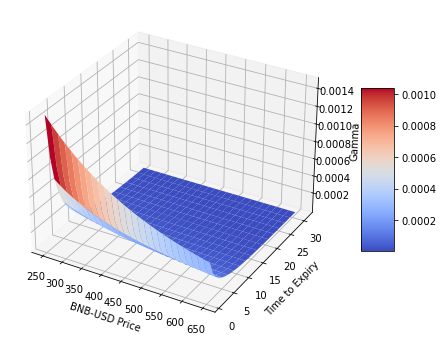

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB-USD Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed

In [47]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [48]:
speed(440, 480, 1/12, 0.0172, 0, 1.07, 'call')

-1.1526512021348347e-06

In [49]:
speed(440, 400, 1/12, 0.0172, 0, 1.07, 'put')

-4.340069262793076e-06

In [50]:
S = np.linspace(250,650,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 480, 1/12, 0.0172, 0, 1.07, 'call')

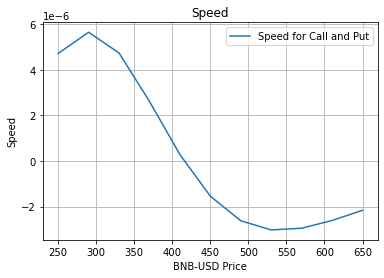

In [51]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('BNB-USD Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

## Surface of Speed

In [52]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [53]:
S = np.linspace(250, 650, 101)
T = np.linspace(1, 31, 31)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 480, T[i], 0.0172, 0, 1.07, 'call')

C:\Users\FULTON~1\AppData\Local\Temp/ipykernel_4596/649176208.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


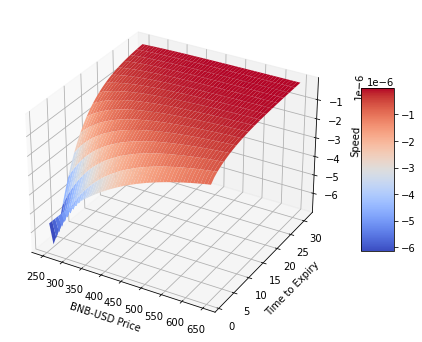

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB-USD Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [55]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [56]:
theta(440, 480, 1/12, 0.0172, 0, 1.07, 'call')

325.62669250227236

In [57]:
theta(440, 400, 1/12, 0.0172, 0, 1.07, 'put')

294.6226053674408

In [58]:
T = np.linspace(1,31,31)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(440, 480, T[i], 0.0172, 0, 1.07, 'call')
    Theta_Put [i] = theta(440, 400, T[i], 0.0172, 0, 1.07, 'put')

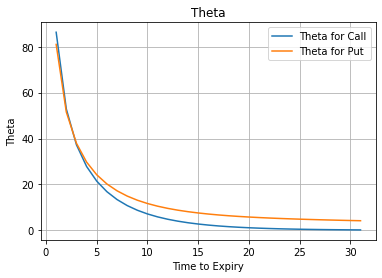

In [59]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

## Surface of Theta

In [60]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [61]:
S = np.linspace(250, 650, 101)
T = np.linspace(1, 31, 31)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 480, T[i], 0.0172, 0, 1.07, 'call')

C:\Users\FULTON~1\AppData\Local\Temp/ipykernel_4596/2054224542.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


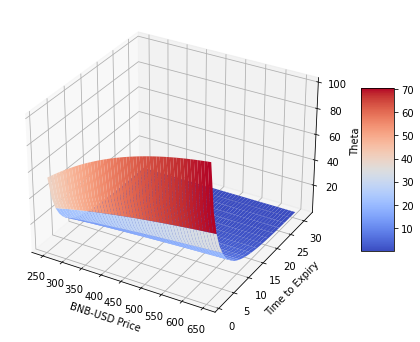

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB-USD Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho

In [63]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [64]:
rho(440, 480, 1/12, 0.0172, 0, 1.07, 'call')

13.30304123293811

In [65]:
rho(440, 400, 1/12, 0.0172, 0, 1.07, 'put')

-14.543388873061053

In [66]:
r = np.linspace(0,0.1,50)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(440, 480, 1/12, r[i], 0, 1.07, 'call')
    Rho_Put [i] = rho(440, 400, 1/12, r[i], 0, 1.07, 'put')

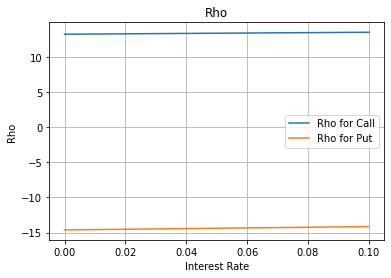

In [67]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

## Surface of Rho

In [68]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [69]:
S = np.linspace(250, 650, 101)
T = np.linspace(1, 31, 31)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 480, T[i], 0.0172, 0, 1.07, 'call')

C:\Users\FULTON~1\AppData\Local\Temp/ipykernel_4596/1418007803.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


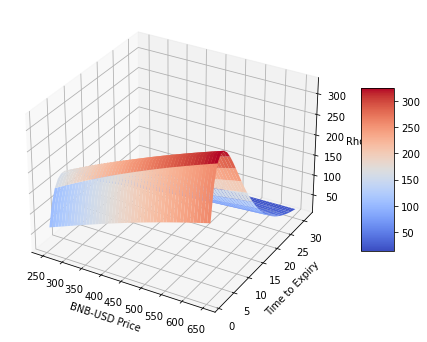

In [70]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('BNB-USD Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);